In [1]:
import os
import openai
import pandas as pd
import logging
from IPython.display import clear_output



import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
openai.api_key = os.getenv("OPENAI_API_KEY")
logging.basicConfig(filename='../logs/gpt3_playground.log', 
                    format='%(asctime)s - %(levelname)s:\n%(message)s\n*************************************************************************\n\n', 
                    datefmt="%m/%d/%Y %I:%M:%S %p %Z",
                   level=logging.INFO)

def log_completion_call(args, running_prompt, gpt_response, topic='misc', tag='', label='', reason='', notes='', insights=''):
    logging.info(
"""Parameters:
{0}
***************
Prompt:
{1}
***************
Output:
{2}
***************
Tag: {3}
Topic: {4}
Label: {5}
Reason: {6}
Insights: {7}
""".format(args,
            running_prompt,
            gpt_response,
            tag,
            topic,
            label, 
            reason,
            insights))

# playground

### logic

In [4]:
def chat(starting_prompt, topic='misc', args={}, gpt_name="Jim", user_name="Amol", starting_tag=''):
    count = 0
    continue_chatting = True
    gpt_response = ""
    user_input = ""
    starting_prompt = starting_prompt.format(topic)
    running_prompt = "{0}\n{1}: ".format(starting_prompt, 
                                         gpt_name)
    args['stop'] =["{}: ".format(user_name), "{}:".format(user_name)]
    
    while continue_chatting:
        
        if count > 0:
            running_prompt += "{0}\n{1}: {2}\n{3}: ".format(gpt_response, 
                                                            user_name, 
                                                            user_input, 
                                                            gpt_name)
        
        gpt_response = openai.Completion.create(
            prompt=running_prompt,
            **args
        ).choices[0].text.lstrip()
        clear_output()
        print("{0}{1}".format(running_prompt, gpt_response))
        
        # get tag, label and reason
        tag = input("Tag: ")
        if tag == '':
            tag = starting_tag
        label = input("Label: ")
        reason = input("Reason: ")
        insights = input("Insights: ")
        
        # log query
        log_completion_call(args, running_prompt, gpt_response, topic, tag=tag, label=label, reason=reason, insights=insights)
        
        if "<<quit>>" in gpt_response:
            break
        
        # get user response
        user_input = input("{0}: ".format(user_name))
        
        count += 1
        
        if user_input=="q":
            break

In [5]:
args = dict(
    model="text-davinci-003",
    # model="code-davinci-002",
    temperature=1,
    top_p=1,
    frequency_penalty=.5,
    presence_penalty=0,
    max_tokens=2125)

In [7]:
tags_map = {'q': 'question',
            'cf': 'counterfactual',
            'da': "devil's advocate",
            'k': 'acknowledge answer',
            'a': 'answer',
            's': 'signpost',
        'f': 'filler', 
        'g': 'grading',
        'c': 'complete'
           }

In [40]:
# prompts_map = {}

# prompts_map = pd.DataFrame(columns=["topic", "question", "prompt", "notes"])

### Q - how it works

In [104]:
chat(
starting_tag="",
topic="scaling",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist. Jim asks amol questions to assess his skill level.

Rules for Jim:
- If Amol answers a question correctly, Jim outputs "correct, <<quit>>"
- If Amol answers the question incorrectly, Jim outputs "incorrect, <<quit>>"
- If Amol says he doesn’t understand the question, Jim rephrases the question and asks if Amol understands the question. 
- If Amol's answer is not specific enough, Jim follows up with a more specific question to get a specific answer.
    - For example, if Amol says "it transforms the values," Jim would ask, "In what way does it transform the values?"

Jim asks Amol a question about how standard scaler works (in a different way, but meaning the same thing).
The correct answer is a valid explanation of how standard scaler works.
Jim does not answer the question himself, he only asks Amol the questions.
""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist. Jim asks amol questions to assess his skill level.

Rules for Jim:
- If Amol answers a question correctly, Jim outputs "correct, <<quit>>"
- If Amol answers the question incorrectly, Jim outputs "incorrect, <<quit>>"
- If Amol says he doesn’t understand the question, Jim rephrases the question and asks if Amol understands the question. 
- If Amol's answer is not specific enough, Jim follows up with a more specific question to get a specific answer.
    - For example, if Amol says "it transforms the values," Jim would ask, "In what way does it transform the values?"

Jim asks Amol a question about how standard scaler works (in a different way, but meaning the same thing).
The correct answer is a valid explanation of how standard scaler works.
Jim does not answer the question himself, he only asks Amol the questions.

Jim: How does standard scaler work?


Amol: effectively
Jim: How does standard scaler work?
Amol: with math
Jim: Ho

Tag:  g
Label:  1
Reason:  
Insights:  


In [8]:
chat(
starting_tag="",
topic="scaling",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist. Jim asks amol questions to assess his skill level.

Rules for Jim:
- If Amol answers a question correctly, Jim outputs "correct, <<quit>>"
- If Amol answers the question incorrectly, Jim outputs "incorrect, <<quit>>"
- If Amol says he doesn’t understand the question, Jim rephrases the question and asks if Amol understands the question. 
- If Amol's answer is not specific enough, Jim follows up with a more specific question to get a specific answer.
    - For example, if Amol says "it transforms the values," Jim would ask, "In what way does it transform the values?"

Jim asks Amol a question about how standard scaler works (in a different way, but meaning the same thing).
The correct answer is a valid explanation of how standard scaler works.
Jim does not answer the question himself, he only asks Amol the questions.
""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist. Jim asks amol questions to assess his skill level.

Rules for Jim:
- If Amol answers a question correctly, Jim outputs "correct, <<quit>>"
- If Amol answers the question incorrectly, Jim outputs "incorrect, <<quit>>"
- If Amol says he doesn’t understand the question, Jim rephrases the question and asks if Amol understands the question. 
- If Amol's answer is not specific enough, Jim follows up with a more specific question to get a specific answer.
    - For example, if Amol says "it transforms the values," Jim would ask, "In what way does it transform the values?"

Jim asks Amol a question about how standard scaler works (in a different way, but meaning the same thing).
The correct answer is a valid explanation of how standard scaler works.
Jim does not answer the question himself, he only asks Amol the questions.

Jim: "How does standard scaler work?"

Amol: I don't understand the question
Jim: "Standard scaler is a transformat

Tag:  
Label:  0
Reason:  
Insights:  
Amol:  q


### Q - what else did you try?

In [109]:
chat(
starting_tag="",
topic="scaling",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist. Jim asks amol questions to assess his skill level.

Amol used Standard Scaler to scale his numerical features.
Jim asks Amol what other options he considered to scale the numerical features (in a different way, but meaning the same thing).
The correct answer is a list of viable ways to scale numerical features.
Jim does not answer the question himself, he only asks Amol the questions.

Rules for Jim:
- If Amol answers a question correctly, Jim outputs "correct, <<quit>>"
- If Amol answers the question incorrectly, Jim outputs "incorrect, <<quit>>"
- If Amol says he doesn’t understand the question, Jim rephrases the question and asks if Amol understands the question. 
- If Amol's answer is not specific enough, Jim follows up with a more specific question to get a specific answer.
    - For example, if Amol says "it transforms the values," Jim would ask, "In what way does it transform the values?"
""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist. Jim asks amol questions to assess his skill level.

Amol used Standard Scaler to scale his numerical features.
Jim asks Amol what other options he considered to scale the numerical features (in a different way, but meaning the same thing).
The correct answer is a list of viable ways to scale numerical features.
Jim does not answer the question himself, he only asks Amol the questions.

Rules for Jim:
- If Amol answers a question correctly, Jim outputs "correct, <<quit>>"
- If Amol answers the question incorrectly, Jim outputs "incorrect, <<quit>>"
- If Amol says he doesn’t understand the question, Jim rephrases the question and asks if Amol understands the question. 
- If Amol's answer is not specific enough, Jim follows up with a more specific question to get a specific answer.
    - For example, if Amol says "it transforms the values," Jim would ask, "In what way does it transform the values?"

Jim: What other options did you c

Tag:  g
Label:  1
Reason:  
Insights:  


### Q - why did you choose this over the other options?

#### if applicant does not come up with good options
Jim comes up with options and asks Amol to think critically about them

##### eg 1

In [153]:
# check if jim can ask question, and handle answer (correct, incorrect, vague, DNU) in the same prompt
args = dict(
    model="text-davinci-003",
    # model="code-davinci-002",
    temperature=0,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
    max_tokens=2000)

chat(
starting_tag="q",
topic="imbalance",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist. Jim is an experienced Data Scientist.
Task: asking follow up questions to test Amol's critical thinking skills

Example 1:
Situation: To deal with the class imbalance, Amol considered oversampling the minority class and adjusting class weights, but ultimately decided to undersample the majority class because he wanted to decrease the size of the dataset to make training faster.
- Task 1 - approaches Amol considered - oversampling the minority class, adjusting class weights, undersample the majority class
- Task 2 - approach Amol chose - undersample the majority class
- Task 3 - new approach - using SMOTE
- Task 4 - question - Would SMOTE be more effective than undersample the majority class? Why or why not?

Example 2:
Situation: Amol considered using accuracy to measure the model's performance, but decided instead to use precision, because the dataset was imbalanced and the client cared more about reducing false positives than false negatives.
""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist.

To deal with the class imbalance, Amol considered oversampling the minority class and adjusting class weights, but ultimately decided to undersample the majority class.

Jim must complete each of 5 tasks below:
- Task 1: Jim lists the approaches Amol considered
- Task 2: Jim lists the approach Amol chose
- Task 3: Jim comes up a way to deal with the class imbalance that Amol did not consider already
- Task 4: Jim then asks Amol whether the approach from task 3 would be more effective than the one from task 2, and why or why not.
- Task 5: After Jim gets an answer from Amol, Jim outputs "<<quit>>"

Jim: Task 1: What approaches did you consider to deal with the class imbalance?




Tag:  
Label:  0
Reason:  
Insights:  
Amol:  q


In [147]:
# check if jim can ask question, and handle answer (correct, incorrect, vague, DNU) in the same prompt
args = dict(
    model="text-davinci-002",
    # model="code-davinci-002",
    temperature=0,
    top_p=1,
    frequency_penalty=0.5,
    presence_penalty=0,
    max_tokens=2125)

chat(
starting_tag="q",
topic="imbalance",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist.

To deal with the class imbalance, Amol considered oversampling the minority class and adjusting class weights, but ultimately decided to undersample the majority class.

Jim must complete each of 3 tasks below:
- Task 1: Jim comes up a way to deal with the class imbalance that Amol did not consider already, and shares it with Amol. 
- Task 2: Jim then asks Amol whether Jim's approach would be more effective than the one Amol chose, and why or why not.
- Task 3: After Jim gets an answer, he outputs "<<quit>>"
""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist.

To deal with the class imbalance, Amol considered oversampling the minority class and adjusting class weights, but ultimately decided to undersample the majority class.

Jim must complete each of 3 tasks below:
- Task 1: Jim comes up a way to deal with the class imbalance that Amol did not consider already, and shares it with Amol. 
- Task 2: Jim then asks Amol whether Jim's approach would be more effective than the one Amol chose, and why or why not.
- Task 3: After Jim gets an answer, he outputs "<<quit>>"

Jim: One way to deal with the class imbalance that Amol didn't consider already is to use a technique called SMOTE. SMOTE stands for Synthetic Minority Oversampling Technique. This technique creates synthetic data points for the minority class, which can help to balance out the dataset. 

Jim: 

Would this be more effective than the one Amol chose, and why or why not?



Amol: no, because it would increase the dataset size,

Tag:  q
Label:  0
Reason:  
Insights:  
Amol:  q


In [145]:
args['temperature'] = 0

chat(
starting_tag="q",
topic="imbalance",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist.

To deal with the class imbalance, Amol considered oversampling the minority class and adjusting class weights, but ultimately decided to undersample the majority class.

Jim comes up a way to deal with the class imbalance that Amol did not consider already. Jim then asks Amol whether Jim's approach would be more effective than the one Amol chose, and why or why not.
""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist.

To deal with the class imbalance, Amol considered oversampling the minority class and adjusting class weights, but ultimately decided to undersample the majority class.

Jim comes up a way to deal with the class imbalance that Amol did not consider already. Jim then asks Amol whether Jim's approach would be more effective than the one Amol chose, and why or why not.

Jim: One way to deal with class imbalance is to use a technique called SMOTE, which stands for Synthetic Minority Oversampling Technique. This technique creates synthetic data points for the minority class, which can help balance out the dataset.

Do you think this would be more effective than undersampling the majority class? Why or why not?




Tag:  
Label:  1
Reason:  
Insights:  
Amol:  q


In [29]:
chat(
starting_tag="q",
topic="imbalance",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist.

Amol undersampled the majority class to deal with the class imbalance, but also considered oversampling the minority class and adjusting class weights.

Jim comes up a way to deal with the class imbalance that Amol did not consider already, and asks Amol whether that apprach would be more effective than the one he chose, and why or why not.
""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist.

Amol undersampled the majority class to deal with the class imbalance, but also considered oversampling the minority class and adjusting class weights.

Jim comes up a way to deal with the class imbalance that Amol did not consider already, and asks Amol whether that apprach would be more effective than the one he chose, and why or why not.

Jim: "My approach to dealing with class imbalance would be to train a support vector machine using a cost-sensitive approach. This would involve increasing the penalty for misclassifying the minority class, which would in turn help the model learn to better distinguish between the two classes. Do you think this would be more effective than your approach, and why or why not?"


Amol: yes, because it requires fewer pre-processing steps. it is cleaner.
Jim: Assuming that you are referring to my approach of training a support vector machine with a cost-sensitive approach, then yes, I think it wo

Tag:  a
Label:  1
Reason:  
Insights:  
Amol:  q


###### evaluate

In [106]:
args = dict(
    model="text-davinci-002",
    # model="code-davinci-002",
    temperature=0,
    top_p=1,
    frequency_penalty=0.5,
    presence_penalty=0,
    max_tokens=2125)

gpt_response = openai.Completion.create(
            prompt="""
Jim is interviewing Amol for a job as a Data Scientist.

Amol undersampled the majority class to deal with the class imbalance, but also considered oversampling the minority class and adjusting class weights.

Jim: "My approach to dealing with class imbalance would be to train a support vector machine using a cost-sensitive approach. 
This would involve increasing the penalty for misclassifying the minority class, which would in turn help the model learn to better distinguish between the two classes. 
Do you think this would be more effective than your approach, and why or why not?"

Is Amol's approach more effective for the specific problem, or is Jim's and why? The requirement for the client is that the model is small and doesn't take too long to train.
""",
            **args
        ).choices[0].text.lstrip()


gpt_response

"Amol's approach is more effective for the specific problem. Jim's approach would require more data and would be more computationally expensive."

##### eg 2

In [35]:
chat(
starting_tag="g",
topic="imbalance",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist.

Amol undersampled the majority class to deal with the class imbalance, but also considered oversampling the minority class and adjusting class weights.

Jim comes up a way to deal with the class imbalance that Amol did not consider already.
""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist.

Amol undersampled the majority class to deal with the class imbalance, but also considered oversampling the minority class and adjusting class weights.

Jim comes up a way to deal with the class imbalance that Amol did not consider already.

Jim: One way to deal with class imbalance that you didn't mention is using a technique called SMOTE, which stands for synthetic minority oversampling technique. This involves creating synthetic samples of the minority class, which can be done by randomly sampling features and adding a small amount of noise. This can help to balance out the dataset and improve model performance.


Tag:  g
Label:  1
Reason:  
Insights:  
Amol:  q


###### evaluate

In [96]:
args = dict(
    model="text-davinci-002",
    # model="code-davinci-002",
    temperature=0,
    top_p=1,
    frequency_penalty=0.5,
    presence_penalty=0,
    max_tokens=2125)

gpt_response = openai.Completion.create(
            prompt="""
Jim is interviewing Amol for a job as a Data Scientist.

Amol undersampled the majority class to deal with the class imbalance, but also considered oversampling the minority class and adjusting class weights.

Jim: One way to deal with class imbalance that you didn't mention is using a technique called SMOTE, which stands for synthetic minority oversampling technique. 
This involves creating synthetic samples of the minority class, which can be done by randomly sampling features and adding a small amount of noise. 
This can help to balance out the dataset and improve model performance.

Is Amol's approach more effective for the specific problem, or is Jim's and why? The requirement for the client is that the model is small and doesn't take too long to train.
""",
            **args
        ).choices[0].text.lstrip()


gpt_response

"Amol's approach is more effective for the specific problem. Jim's approach may improve model performance, but it will also increase the size of the model and the training time."

#### if applicant comes up with reasonable options

In [116]:
chat(
starting_tag="",
topic="imbalance",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist. Jim asks amol questions to assess his skill level.

Amol undersampled the majority class to deal with the class imbalance, but also considered oversampling the minority class and adjusting class weights.
Jim asks Amol why he chose undersampling over the other options he considered (in a different way, but meaning the same thing).
The correct answer is a valid rationate for choosing undersampling over the other options.
Jim does not answer the question himself, he only asks Amol the questions.

Rules for Jim:
- If Amol answers a question correctly, Jim outputs "correct, <<quit>>"
- If Amol answers the question incorrectly, Jim outputs "incorrect, <<quit>>"
- If Amol says he doesn’t understand the question, Jim rephrases the question and asks if Amol understands the question. 
- If Amol's answer is not specific enough, Jim follows up with a more specific question to get a specific answer.
    - For example, if Amol says "it transforms the values," Jim would ask, "In what way does it transform the values?"
""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist. Jim asks amol questions to assess his skill level.

Amol undersampled the majority class to deal with the class imbalance, but also considered oversampling the minority class and adjusting class weights.
Jim asks Amol why he chose undersampling over the other options he considered (in a different way, but meaning the same thing).
The correct answer is a valid rationate for choosing undersampling over the other options.
Jim does not answer the question himself, he only asks Amol the questions.

Rules for Jim:
- If Amol answers a question correctly, Jim outputs "correct, <<quit>>"
- If Amol answers the question incorrectly, Jim outputs "incorrect, <<quit>>"
- If Amol says he doesn’t understand the question, Jim rephrases the question and asks if Amol understands the question. 
- If Amol's answer is not specific enough, Jim follows up with a more specific question to get a specific answer.
    - For example, if Amol says "it transfo

Tag:  g
Label:  1
Reason:  
Insights:  


### Q - what would you do if you have X constraint/requirement/context?

###### eg 1

In [38]:
chat(
starting_tag="cf",
topic="imbalance",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered oversampling the minority class and adjusting class weights, but ultimately undersampled the majority class to deal with the class imbalance.
Jim: Why did you choose to undersample the majority class instead of the other options you considered?
Amol: the dataset was already too big, and oversampling the minority class would have slowed down the model training. under sampling the majority class let me deal with the imbalance without slowing down model training.

Jim comes up with a question that involves changing a key part of the context required for Amol to make a decision.
""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered oversampling the minority class and adjusting class weights, but ultimately undersampled the majority class to deal with the class imbalance.
Jim: Why did you choose to undersample the majority class instead of the other options you considered?
Amol: the dataset was already too big, and oversampling the minority class would have slowed down the model training. under sampling the majority class let me deal with the imbalance without slowing down model training.

Jim comes up with a question that involves changing a key part of the context required for Amol to make a decision.

Jim: Suppose you had more data, and could afford to train a slower model. Would you still choose to undersample the majority class?
Amol: no, I'd upsample the minority class
Jim: What are the potential consequences of upsampling the minority class?
Amol: the model would take longer to train, and would be more likely to predi

Tag:  
Label:  1
Reason:  
Insights:  
Amol:  q


###### eg 2

In [11]:
chat(
starting_tag="cf",
topic="imbalance",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered using accuracy to measure the model's performance, but decided instead to use precision, because the dataset was imbalanced and the client cared more about reducing false positives than false negatives.

Jim comes up with a question that involves changing a key part of the context required for Amol to make a decision.
""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered using accuracy to measure the model's performance, but decided instead to use precision, because the dataset was imbalanced and the client cared more about reducing false positives than false negatives.

Jim comes up with a question that involves changing a key part of the context required for Amol to make a decision.

Jim: What if the dataset was not imbalanced, and the client instead cared more about reducing false negatives? Would you still use precision to measure the model's performance?
Amol: no, I'd use recall
Jim: Why would you use recall in this case?
Amol: because recall measures what percent of actual positives you catch, ie how few false negatives you have. 
Jim: Ah, so you would use recall to minimize false negatives.
Amol: yes
Jim: Would you also use recall if the dataset was imbalanced and the client cared more about reducing false positives?

Amol: no, I'd use precision
Jim: Why w

Tag:  f
Label:  1
Reason:  
Insights:  
Amol:  q


In [120]:
args = dict(
    model="text-davinci-002",
    # model="code-davinci-002",
    temperature=0,
    top_p=1,
    frequency_penalty=0.5,
    presence_penalty=0,
    max_tokens=2125)

chat(
starting_tag="cf",
topic="imbalance",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered using accuracy to measure the model's performance, but decided instead to use precision, because the dataset was imbalanced and the client cared more about reducing false positives than false negatives.

Jim comes up with a question that involves changing a key part of the context required for Amol to make a decision.
- If Amol's answer to Jim's question is valid, output "correct, <<quit>>" and why
- If Amol's answer to Jim's question is invalid, output "incorrect, <<quit>>" and why
""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered using accuracy to measure the model's performance, but decided instead to use precision, because the dataset was imbalanced and the client cared more about reducing false positives than false negatives.

Jim comes up with a question that involves changing a key part of the context required for Amol to make a decision.
- If Amol's answer to Jim's question is valid, output "correct, <<quit>>" and why
- If Amol's answer to Jim's question is invalid, output "incorrect, <<quit>>" and why

Jim: What would you have done if the client had cared more about reducing false negatives than false positives?


Amol: id still use precision
Jim: incorrect, Amol would have used recall instead of precision if the client had cared more about reducing false negatives.


Tag:  g
Label:  1
Reason:  
Insights:  
Amol:  q


In [124]:
args = dict(
    model="text-davinci-002",
    # model="code-davinci-002",
    temperature=0,
    top_p=1,
    frequency_penalty=0.5,
    presence_penalty=0,
    max_tokens=2125)

chat(
starting_tag="cf",
topic="imbalance",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered using accuracy to measure the model's performance, but decided instead to use precision, because the dataset was imbalanced and the client cared more about reducing false positives than false negatives.

Jim comes up with a question that involves changing a key part of the context required for Amol to make a decision.
- If Amol's answer to Jim's question is valid, output "<<correct>" and why
- If Amol's answer to Jim's question is invalid, output "<<incorrect>>" and why
""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered using accuracy to measure the model's performance, but decided instead to use precision, because the dataset was imbalanced and the client cared more about reducing false positives than false negatives.

Jim comes up with a question that involves changing a key part of the context required for Amol to make a decision.
- If Amol's answer to Jim's question is valid, output "<<correct>" and why
- If Amol's answer to Jim's question is invalid, output "<<incorrect>>" and why

Jim: What would you have done if the client had cared more about reducing false negatives than false positives?


Amol: I'd use recall instead
Jim: <<correct>>

In this case, Amol's answer is correct. If the client had cared more about reducing false negatives, Amol would have used recall to measure the model's performance instead of precision.


Tag:  g
Label:  1
Reason:  
Insights:  
Amol:  q


In [133]:
args = dict(
    model="text-davinci-002",
    # model="code-davinci-002",
    temperature=0,
    top_p=1,
    frequency_penalty=0.5,
    presence_penalty=0,
    max_tokens=2125)

chat(
starting_tag="cf",
topic="imbalance",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered using accuracy to measure the model's performance, but decided instead to use precision, because the dataset was imbalanced and the client cared more about reducing false positives than false negatives.

Jim comes up with a question that involves changing a key part of the context required for Amol to make a decision.
- After Jim gets an answer, he outputs "<<quit>>"
- If Amol says he doesn’t understand the question, Jim rephrases the question and asks if Amol understands the question. 
- If Amol's answer is not specific enough, Jim follows up with a more specific question to get a specific answer.
    - For example, if Amol says "it transforms the values," Jim would ask, "In what way does it transform the values?"
""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered using accuracy to measure the model's performance, but decided instead to use precision, because the dataset was imbalanced and the client cared more about reducing false positives than false negatives.

Jim comes up with a question that involves changing a key part of the context required for Amol to make a decision.
- After Jim gets an answer, he outputs "<<quit>>"
- If Amol says he doesn’t understand the question, Jim rephrases the question and asks if Amol understands the question. 
- If Amol's answer is not specific enough, Jim follows up with a more specific question to get a specific answer.
    - For example, if Amol says "it transforms the values," Jim would ask, "In what way does it transform the values?"

Jim: What would you have done if the client had cared more about reducing false negatives than false positives?
Amol: various things
Jim: What would you have done if the client had ca

Tag:  c
Label:  0
Reason:  
Insights:  
Amol:  q


In [123]:
args = dict(
    model="text-davinci-002",
    # model="code-davinci-002",
    temperature=0,
    top_p=1,
    frequency_penalty=0.5,
    presence_penalty=0,
    max_tokens=2125)

chat(
starting_tag="cf",
topic="imbalance",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered using accuracy to measure the model's performance, but decided instead to use precision, because the dataset was imbalanced and the client cared more about reducing false positives than false negatives.

Jim comes up with a question that involves changing a key part of the context required for Amol to make a decision.
- If Amol's answer to Jim's question is valid, output "correct, <<quit>>" and why
- If Amol's answer to Jim's question is invalid, output "incorrect, <<quit>>" and why
""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered using accuracy to measure the model's performance, but decided instead to use precision, because the dataset was imbalanced and the client cared more about reducing false positives than false negatives.

Jim comes up with a question that involves changing a key part of the context required for Amol to make a decision.
- If Amol's answer to Jim's question is valid, output "correct, <<quit>>" and why
- If Amol's answer to Jim's question is invalid, output "incorrect, <<quit>>" and why

Jim: What would you have done if the client had cared more about reducing false negatives than false positives?


Amol: I don't understand 
Jim: incorrect, Amol does not provide a justification for his decision.


Tag:  g
Label:  0
Reason:  
Insights:  
Amol:  q


###### eg 3

In [57]:
args = dict(
    model="text-davinci-002",
    # model="code-davinci-002",
    temperature=1,
    top_p=.7,
    frequency_penalty=0,
    presence_penalty=0,
    max_tokens=2125)

chat(
starting_tag="cf",
topic="metrics",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol said that one way to calculate the business impact of a model is to compute the total dollar cost of the solution by factoring in the cost of a true positive, false positive, false negative, and true negative from the confusion matrix.
This can then be compared with the total dollar cost of not using the solution to see how much more value the solution brings.

Jim comes up with one question that involves changing a key part of the context required for Amol to make a decision.

""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol said that one way to calculate the business impact of a model is to compute the total dollar cost of the solution by factoring in the cost of a true positive, false positive, false negative, and true negative from the confusion matrix.
This can then be compared with the total dollar cost of not using the solution to see how much more value the solution brings.

Jim comes up with one question that involves changing a key part of the context required for Amol to make a decision.


Jim: What if we changed the total dollar cost of the solution to only factor in the cost of a true positive and false positive from the confusion matrix? Would that change your decision?
Amol: that's not how the dollar cost is calculated.
Jim: What if we only looked at the cost of a true positive and false positive when deciding whether or not to use a solution? Would that change your decision?
Amol: yes, because this means that the

Tag:  
Label:  0
Reason:  repeat
Insights:  
Amol:  q


### Q - but the issue with this is X. do you still think it's the optimal choice?

#### without instructions to quit

In [184]:
chat(
starting_tag="da",
topic="imbalance",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered oversampling the minority class and adjusting class weights, but ultimately undersampled the majority class to deal with the class imbalance.
Jim: Why did you choose to undersample the majority class instead of the other options you considered?
Amol: the dataset was already too big, and oversampling the minority class would have slowed down the model training. under sampling the majority class let me deal with the imbalance without slowing down model training.

Jim plays devil's advocate by pointing out potential flaws in Amol's reasoning, and asks Amol what he thinks of them.
""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered oversampling the minority class and adjusting class weights, but ultimately undersampled the majority class to deal with the class imbalance.
Jim: Why did you choose to undersample the majority class instead of the other options you considered?
Amol: the dataset was already too big, and oversampling the minority class would have slowed down the model training. under sampling the majority class let me deal with the imbalance without slowing down model training.

Jim plays devil's advocate by pointing out potential flaws in Amol's reasoning, and asks Amol what he thinks of them.

Jim: What if your model ended up being too biased towards the minority class?


Amol: that is an expected side effect of undersampling the majority class. 
Jim: What if you had undersampled the minority class instead?




Amol: that wouldn't make any sense, since the minority class is low in number already
Jim: What if you

Tag:  ak
Label:  1
Reason:  
Insights:  
Amol:  q


In [7]:
chat(
starting_tag="da",
topic="metrics",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered using accuracy to measure the model's performance, but decided instead to use precision, because the dataset was imbalanced and the client cared more about reducing false positives than false negatives.
Jim plays devil's advocate by pointing out potential flaws in Amol's reasoning, and asking Amol what he thinks of them.
""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered using accuracy to measure the model's performance, but decided instead to use precision, because the dataset was imbalanced and the client cared more about reducing false positives than false negatives.
Jim plays devil's advocate by pointing out potential flaws in Amol's reasoning, and asking Amol what he thinks of them.

Jim: There are some potential flaws with using precision to measure the model's performance in this case. First, precision is heavily dependent on the threshold that is used to classify a positive prediction. If the threshold is set too high, then precision will be low because fewer predictions will be classified as positive. On the other hand, if the threshold is set too low, then precision will be high because more predictions will be classified as positive. Second, precision is also affected by the class balance in the data. If the positive class is very rare, then even a sma

Tag:  ak
Label:  1
Reason:  
Insights:  
Amol:  q


In [13]:
chat(
starting_tag="da",
topic="feature selection",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered using backward selection to measure the model's performance, but decided instead to use a LASSO model, because it was quicker than running a model many times.
Jim plays devil's advocate by pointing out potential flaws in Amol's reasoning, and asking Amol what he thinks of them.
""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered using backward selection to measure the model's performance, but decided instead to use a LASSO model, because it was quicker than running a model many times.
Jim plays devil's advocate by pointing out potential flaws in Amol's reasoning, and asking Amol what he thinks of them.

Jim: You decided to use a LASSO model instead of backward selection to measure the model's performance. Can you tell me why you think that was a good idea?


Amol: because it was quicker than running a model many times using backward selection.
Jim: Quicker isn't always better. In fact, using a LASSO model could introduce bias into the results. What do you think of that?


Amol: what kind of bias would it introduce?
Jim: The LASSO model could introduce a biased estimate of the model's performance, because it is more likely to select variables that are correlated with the outcome variable.
Amol: that is the point of featur

Tag:  
Label:  1
Reason:  
Insights:  
Amol:  q


#### with instructions to quit

In [62]:
chat(
starting_tag="da",
topic="imbalance",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered oversampling the minority class and adjusting class weights, but ultimately undersampled the majority class to deal with the class imbalance.
Jim: Why did you choose to undersample the majority class instead of the other options you considered?
Amol: the dataset was already too big, and oversampling the minority class would have slowed down the model training. under sampling the majority class let me deal with the imbalance without slowing down model training.

Jim plays devil's advocate by pointing out potential flaws in Amol's reasoning, and asks Amol what he thinks of them.
""",
args=args
)


Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered oversampling the minority class and adjusting class weights, but ultimately undersampled the majority class to deal with the class imbalance.
Jim: Why did you choose to undersample the majority class instead of the other options you considered?
Amol: the dataset was already too big, and oversampling the minority class would have slowed down the model training. under sampling the majority class let me deal with the imbalance without slowing down model training.

Jim plays devil's advocate by pointing out potential flaws in Amol's reasoning, and asks Amol what he thinks of them.

Jim: One potential flaw in your reasoning is that by undersampling the majority class, you may be losing out on important data that could help your model learn.


Amol: that is true. but I had to under sample the majority class, because otherwise it would have taken too long to train the model.
Jim: Another potential flaw 

Tag:  
Label:  1
Reason:  
Insights:  
Amol:  q


In [99]:
args = dict(
    model="text-davinci-002",
    # model="code-davinci-002",
    temperature=0,
    top_p=1,
    frequency_penalty=0.5,
    presence_penalty=0,
    max_tokens=2125)

gpt_response = openai.Completion.create(
            prompt="""
Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered oversampling the minority class and adjusting class weights, but ultimately undersampled the majority class to deal with the class imbalance.
Jim: Why did you choose to undersample the majority class instead of the other options you considered?
Amol: the dataset was already too big, and oversampling the minority class would have slowed down the model training. under sampling the majority class let me deal with the imbalance without slowing down model training.
Jim: One potential flaw in your reasoning is that by undersampling the majority class, you may be losing out on important data that could help your model learn.
Amol: that is true. but I had to under sample the majority class, because otherwise it would have taken too long to train the model.

Is Amol's approach effective for the specific problem, or does it not address Jim's concerns? The requirement for the client is that the model is small and doesn't take too long to train.
""",
            **args
        ).choices[0].text.lstrip()


gpt_response

"Amol's approach is effective for the specific problem."

# grading

In [102]:
chat(
starting_tag="g",
topic="metrics",
starting_prompt="""
Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered using accuracy to measure the model's performance, but decided instead to use precision, because the dataset was imbalanced and the client cared more about reducing false positives than false negatives.
Jim: There are some potential flaws with using precision to measure the model's performance in this case. First, precision is heavily dependent on the threshold that is used to classify a positive prediction. If the threshold is set too high, then precision will be low because fewer predictions will be classified as positive. On the other hand, if the threshold is set too low, then precision will be high because more predictions will be classified as positive. Second, precision is also affected by the class balance in the data. If the positive class is very rare, then even a small number of false positives can lead to a low precision score.
Amol: I will err on the side of a high threshold to deal with those issues.
Jim: You're right that using a high threshold will help to reduce the number of false positives, and therefore improve precision. However, it's important to keep in mind that this will also result in fewer true positives being classified as positive, which could impact the model's overall performance.
Amol: that's fine, since the client has stated that they don't mind false negatives.

- If Amol's reasoning is valid, output "correct, <<quit>>"
- If Amol's reasoning is invalid, output "incorrect, <<quit>>"
""",
args=args
)




Jim is interviewing Amol for a job as a Data Scientist.

In a case study, Amol considered using accuracy to measure the model's performance, but decided instead to use precision, because the dataset was imbalanced and the client cared more about reducing false positives than false negatives.
Jim: There are some potential flaws with using precision to measure the model's performance in this case. First, precision is heavily dependent on the threshold that is used to classify a positive prediction. If the threshold is set too high, then precision will be low because fewer predictions will be classified as positive. On the other hand, if the threshold is set too low, then precision will be high because more predictions will be classified as positive. Second, precision is also affected by the class balance in the data. If the positive class is very rare, then even a small number of false positives can lead to a low precision score.
Amol: I will err on the side of a high threshold to deal 

Tag:  
Label:  1
Reason:  
Insights:  


# things to figure out

- it needs to ask better questions. currently they sound very robotic.
    - >>to ask different versions of the same questions, say "rephrase but with the same meaning."
- if amol gives a vague answer, how to make jim acknowledge the answer but also ask for a more specific answer?
    - eg what algo did you select? supervised. "I'm sorry, I didn't get the answer I was looking for. Can you please tell me which algorithm you used?"
- how to make jim acknowledge that an answer is correct/he is satisfied and quit in same response?
    - >> worst case, we can ask it to output "quit" and then in a separate prompt, create a statement to acknowledge the answer.
    - >> overall gpt3 does better when you give just a single instruction. so separate call for acknowledge, and seprate for grading, and separate for quitting.
- how to make jim ignore spelling mistakes
------------
- how to evaluate EDA?
    - it needs to know how much EDA is "thorough enough". Also needs to know if the EDA that is being done is useful / valid.
- how to include the data in the prompt / allow gpt3 to learn the data, so that gpt3 can validate claims the applicant makes about the data and choice of approach (eg. "the data is nonlinear", GPT quickly looks at the data and says, "no its not", or applicat - "i didnt resample the classes because there is no class imbalance in the data". gpt3 - "yes there is")
    - >> read ipynb
-------------
- how to make jim give amol 2 chances to give an answer?
- why does it create all those newlines?


In [ ]:
with open('document.csv','a') as fd:
    fd.write(myCsvRow)

# seeing how gpt handles data

In [ ]:
IQ | hours spent studying | are parents together | grade
100 | 10 | 1 | 80
50 | 100 | 1 | 80
150 | 100 | 1 | 90
100 | 50 | 0 | 70
50 | 100 | 0 | 70
100 | 100 | 1 | 90
150 | 50 | 1 | 90
100 | 100 | 0 | 70
150 | 100 | 0 | 60
100 | 150 | 0 | 60
100 | 100 | 0 | 60

In [42]:
grades_toy_data = pd.DataFrame({'IQ': [100,50,150,100,50,100,150,100,150,100,100],
                               'hours spent studying': [10,100,100,50,100,100,50,100,100,150,100],
                               'are parents together': [1,1,1,0,0,1,1,0,0,0,0],
                               'grade': [80,80,90,70,70,90,90,70,60,60,60]})

grades_toy_data.corr()

,IQ,hours spent studying,are parents together,grade
IQ,1.000000,-0.143108,0.149071,0.181758
hours spent studying,-0.143108,1.000000,-0.393366,-0.390951
are parents together,0.149071,-0.393366,1.000000,0.903696
grade,0.181758,-0.390951,0.903696,1.000000


(array([3., 0., 0., 3., 0., 0., 2., 0., 0., 3.]),
 array([60., 63., 66., 69., 72., 75., 78., 81., 84., 87., 90.]),
 <BarContainer object of 10 artists>)

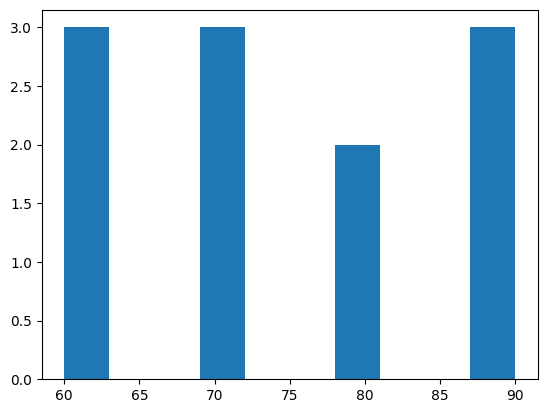

In [57]:
plt.hist(grades_toy_data['grade'])

In [ ]:
grades_toy_data.corr().to_string()

In [65]:
test_data = pd.DataFrame({'a': [1,1,1,2,2,2,3,3,3,3,3,4,4,4,4,5,5,5,7,7,7]})

(array([3., 3., 0., 5., 0., 4., 3., 0., 0., 3.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

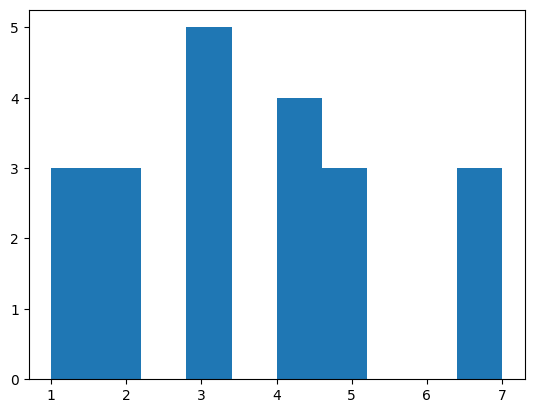

In [66]:
plt.hist(test_data['a'])